In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("2018_2019_24-59mos_underweight_complete.csv")
data.head()

,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,underweight
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,1
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,1
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,1


In [3]:
data.describe()

,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,underweight
count,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,...,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000,14490.000000
mean,3.390338,42.464182,2.038923,1.481366,0.975983,0.888820,0.912491,1.114217,1.012215,2975.107246,...,2.116908,2.339337,11.801311,10.927398,0.463423,0.407660,0.231263,0.192133,0.624983,0.211249
std,0.912118,10.313172,0.812459,0.499670,0.153106,0.314366,0.282589,0.318085,0.111099,598.736035,...,3.606307,3.626028,15.130543,12.847920,0.498678,0.491416,0.421655,0.393990,0.484144,0.408209
min,2.000000,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,900.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2629.000000,...,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,43.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3000.000000,...,0.000000,0.000000,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,51.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3200.000000,...,1.000000,4.000000,13.000000,13.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,60.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,9500.000000,...,9.000000,9.000000,91.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14490 entries, 0 to 14489
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age_child        14490 non-null  int64
 1   agemos           14490 non-null  int64
 2   AgeGroup         14490 non-null  int64
 3   sex_child        14490 non-null  int64
 4   gastation        14490 non-null  int64
 5   place_delivery   14490 non-null  int64
 6   assistd          14490 non-null  int64
 7   typeofd          14490 non-null  int64
 8   pregtype         14490 non-null  int64
 9   bw_grams         14490 non-null  int64
 10  bw_status        14490 non-null  int64
 11  ethnicity        14490 non-null  int64
 12  age_mom          14490 non-null  int64
 13  agegroup_mom     14490 non-null  int64
 14  csc_mom          14490 non-null  int64
 15  psccat_mom       14490 non-null  int64
 16  educ_mom         14490 non-null  int64
 17  occup_mom        14490 non-null  int64
 18  work_s

In [5]:
#here we check if there is missing values or not 
data.isnull().sum()

age_child          0
agemos             0
AgeGroup           0
sex_child          0
gastation          0
place_delivery     0
assistd            0
typeofd            0
pregtype           0
bw_grams           0
bw_status          0
ethnicity          0
age_mom            0
agegroup_mom       0
csc_mom            0
psccat_mom         0
educ_mom           0
occup_mom          0
work_status_mom    0
age_hh             0
agegroup_HH        0
sex_hh             0
educ_hh            0
psoc_hh            0
work_status_hh     0
urbanity           0
hhsize             0
hhsize_code        0
drinkingwater      0
recipient_4ps      0
toilet             0
electrct1          0
drinksafe          0
makesafe           0
wcooking           0
whands             0
collect            0
burn               0
composting         0
dump               0
segregate          0
underweight        0
dtype: int64

In [6]:
df=data.copy() #copy of our data 

<AxesSubplot:>

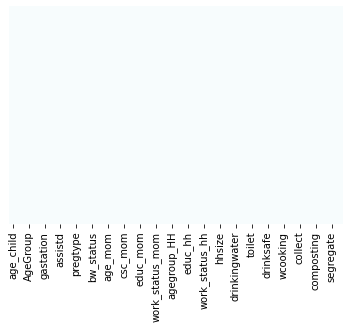

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='BuPu')

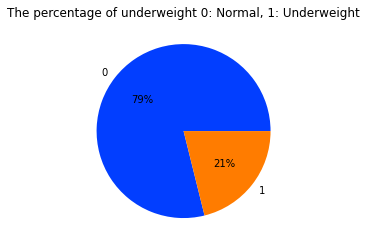

In [8]:
data = df["underweight"].value_counts()
labels = df["underweight"].value_counts().index

palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("The percentage of underweight 0: Normal, 1: Underweight");
#There is 201 null BMI values on the dataset. Additionally the data is imbalance therefore we need to solve these issues for better results.

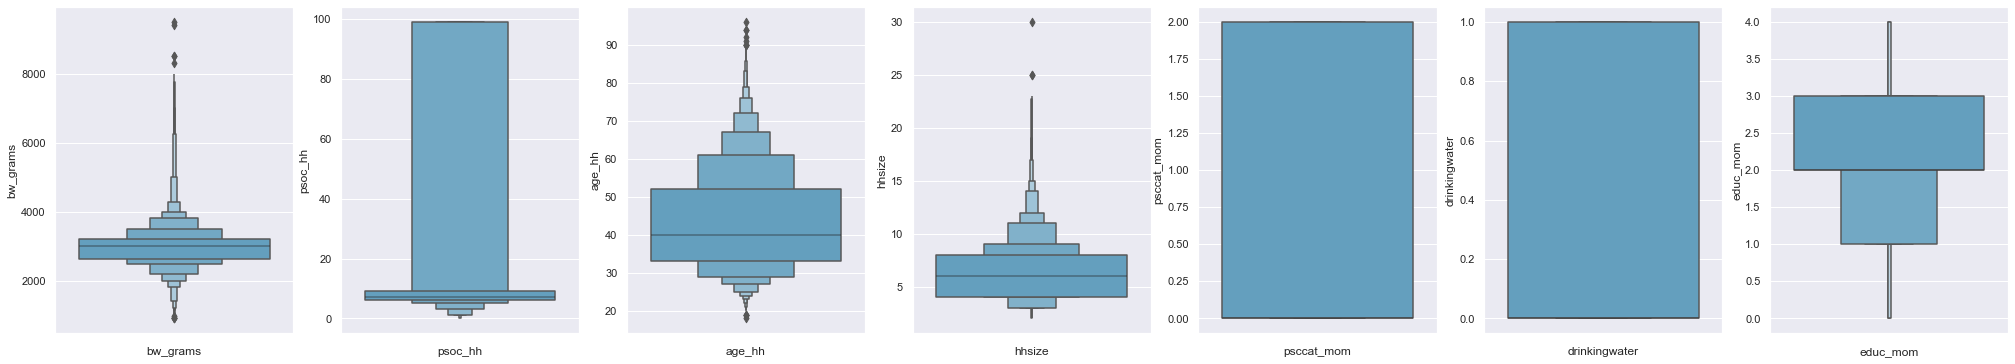

In [9]:
# Set seaborn style palette
sns.set_theme(style="darkgrid", palette="icefire")

# Array of columns that we would like to plot
cols = ['bw_grams','psoc_hh','age_hh','hhsize',
           'psccat_mom','drinkingwater','educ_mom']

# Instantiate figure and axes for as many subplots as the columns in question
fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

# Draw a Boxen Plot for each column in question
for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

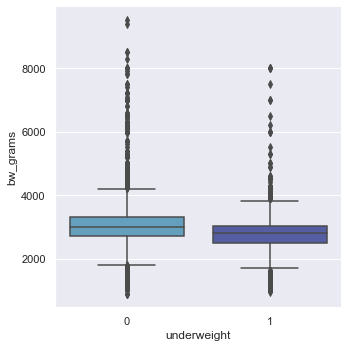

In [10]:
sns.catplot(data=df, x="underweight", y="bw_grams", kind="box") #checking for outliers

In [11]:
indexAge = data[((df['bw_grams'] < 1900) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bw_grams'] > 4100) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bw_grams'] < 1900) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['bw_grams'] > 3800) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

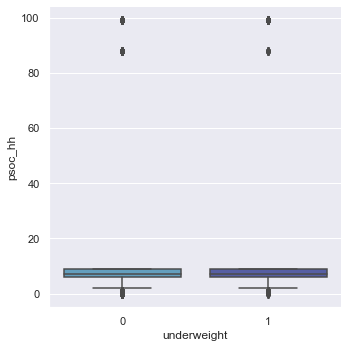

In [12]:
sns.catplot(data=df, x="underweight", y="psoc_hh", kind="box") #checking for outliers

In [13]:
indexAge = data[((df['psoc_hh'] < 5) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['psoc_hh'] > 80) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['psoc_hh'] < 5) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['psoc_hh'] > 80) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

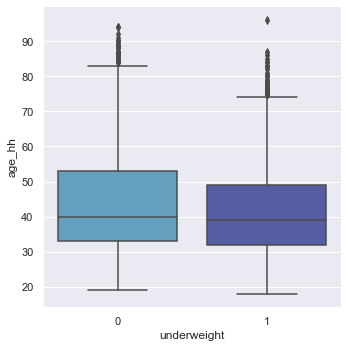

In [14]:
sns.catplot(data=df, x="underweight", y="age_hh", kind="box") #checking for outliers

In [15]:
indexAge = data[((df['age_hh'] > 85) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['age_hh'] > 73) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

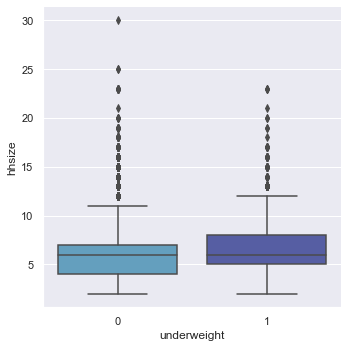

In [16]:
sns.catplot(data=df, x="underweight", y="hhsize", kind="box") #checking for outliers

In [17]:
indexAge = data[((df['hhsize'] > 12) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['hhsize'] > 13) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

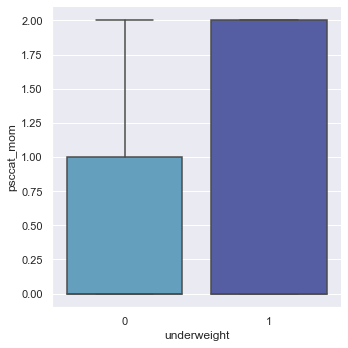

In [18]:
sns.catplot(data=df, x="underweight", y="psccat_mom", kind="box") #checking for outliers

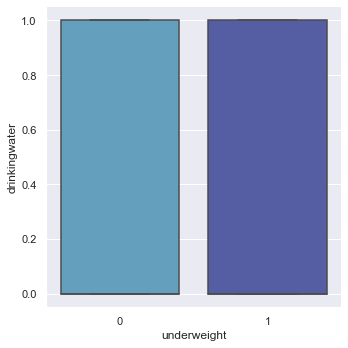

In [19]:
sns.catplot(data=df, x="underweight", y="drinkingwater", kind="box") #checking for outliers

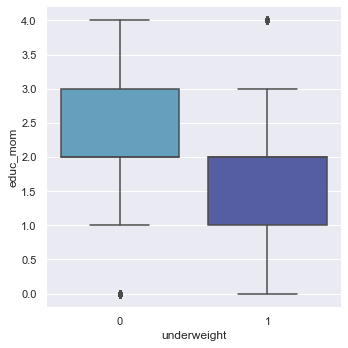

In [20]:
sns.catplot(data=df, x="underweight", y="educ_mom", kind="box") #checking for outliers

In [21]:
indexAge = data[((df['educ_mom'] < 0) & (df['underweight'] == 0)) ].index
data.drop(indexAge , inplace=True)

indexAge = data[((df['educ_mom'] > 4) & (df['underweight'] == 1)) ].index
data.drop(indexAge , inplace=True)

0    11429
1     3061
Name: underweight, dtype: int64


<AxesSubplot:>

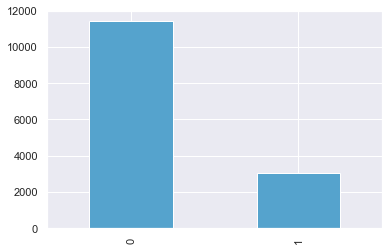

In [22]:
##### show the value counts of the calsses in the target
#we can find data impalance
print(df['underweight'].value_counts())
df['underweight'].value_counts().sort_index().plot.bar()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [84]:
X = df[["bw_grams","psoc_hh","age_hh","hhsize",
           "psccat_mom"]]
y = df["underweight"].to_frame()

In [85]:
X_train, x_test, y_train , y_test = train_test_split(X,y, test_size=0.25 , random_state=42)

In [86]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X = df[["bw_grams","psoc_hh","age_hh","hhsize",
           "psccat_mom"]]
y = df["underweight"]
X_over, y_over = oversample.fit_resample(X, y)

In [87]:
# Apply oversampling
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y.ravel())

1    11429
0    11429
Name: underweight, dtype: int64


<AxesSubplot:>

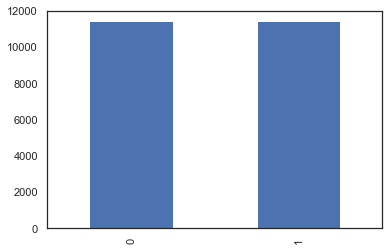

In [88]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

In [89]:
X_train, x_test, y_train , y_test = train_test_split(X_balanced,y_balanced, test_size=0.25 , random_state=42)

In [90]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import scikitplot as skplt

In [91]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1, random_state=0)
xgb.fit(X_balanced, y_balanced)

y_pred_train_xgb = xgb.predict(X_balanced)
acc_train_xgb = accuracy_score(y_balanced, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(acc_train_xgb)
print(acc_test_xgb)

xgb_perc_score = precision_score(y_test, y_pred_test_xgb)
xgb_rec_score= recall_score(y_test, y_pred_test_xgb)
xgb_f1_score = f1_score(y_test, y_pred_test_xgb)

print('Precision: %.3f' %xgb_perc_score )
print('Recall: %.3f' % xgb_rec_score)
print('F-measure: %.3f' % xgb_f1_score)

y_pred_prob_xgb = xgb.predict_proba(x_test)[:, 1]
xgb_roc_auc_score = roc_auc_score(y_test, y_pred_prob_xgb)
print('ROC AUC Score:', xgb_roc_auc_score)

0.7084609327150232
0.7130358705161854
Precision: 0.705
Recall: 0.737
F-measure: 0.721
ROC AUC Score: 0.7907510651399783


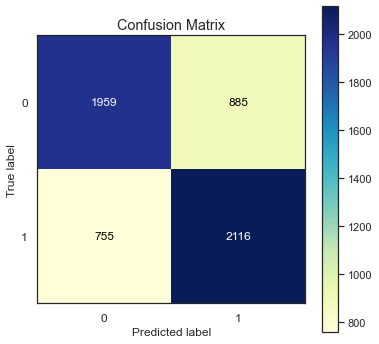

In [92]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_xgb, figsize=(6,6), cmap= 'YlGnBu');

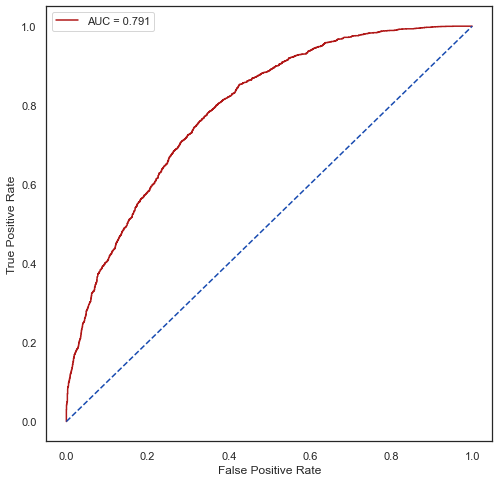

In [93]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [94]:
svc = SVC(C=10, gamma=1000 ,probability= True)
svc.fit(X_balanced, y_balanced)

y_pred_train_svc = svc.predict(X_balanced)
acc_train_svc = accuracy_score(y_balanced, y_pred_train_svc)

y_pred_test_svc = svc.predict(x_test)
acc_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(acc_train_svc)
print(acc_test_svc)

svc_perc_score = precision_score(y_test, y_pred_test_svc)
svc_rec_score= recall_score(y_test, y_pred_test_svc)
svc_f1_score = f1_score(y_test, y_pred_test_svc)

print('Precision: %.3f' % svc_perc_score)
print('Recall: %.3f' % svc_rec_score)
print('F-measure: %.3f' % svc_f1_score)

y_pred_prob_svc = svc.predict_proba(x_test)[:, 1]
svc_roc_auc_score=  roc_auc_score(y_test, y_pred_prob_svc)
print('ROC AUC Score:', svc_roc_auc_score)

0.955507918453058
0.9595800524934384
Precision: 0.965
Recall: 0.954
F-measure: 0.960
ROC AUC Score: 0.973652390337244


In [95]:
x_test.head()

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom
5505,3000,1,25,4,0
15602,3300,9,32,4,0
11233,2733,9,27,5,0
13916,3100,8,33,5,0
18536,2400,8,35,7,0


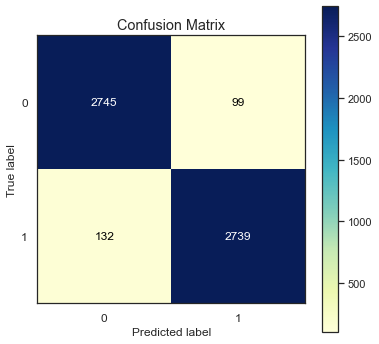

In [96]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_svc, figsize=(6,6), cmap= 'YlGnBu');

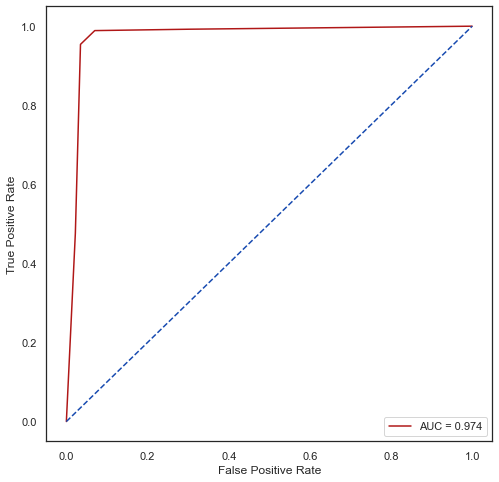

In [97]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# DECISION TREE MODEL

In [98]:
dt =DecisionTreeClassifier(max_features=5 , max_depth=12,criterion = 'entropy', random_state=0)
dt.fit(X_balanced, y_balanced)

y_pred_train_dt = dt.predict(X_balanced)
acc_train_dt = accuracy_score(y_balanced, y_pred_train_dt)

y_pred_test_dt = dt.predict(x_test)
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

dt_perc_score = precision_score(y_test, y_pred_test_dt)
dt_rec_score= recall_score(y_test, y_pred_test_dt)
dt_f1_score = f1_score(y_test, y_pred_test_dt)

print('Precision: %.3f' % dt_perc_score)
print('Recall: %.3f' % dt_rec_score)
print('F-measure: %.3f' % dt_f1_score)

y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]
dt_roc_auc_score = roc_auc_score(y_test, y_pred_prob_dt)
print('ROC AUC Score:', dt_roc_auc_score)

0.7190480356986613
0.7247594050743658
Precision: 0.704
Recall: 0.780
F-measure: 0.740
ROC AUC Score: 0.8105374149859819


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

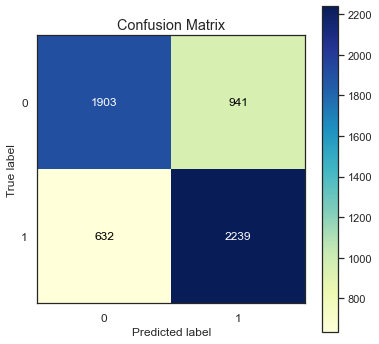

In [99]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt, figsize=(6,6), cmap= 'YlGnBu')

# RANDOM FOREST CLASSIFIER

In [100]:
rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(X_balanced,y_balanced)

RandomForestClassifier(criterion='entropy', random_state=0)

In [101]:
X_balanced.head()

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom
0,2400,6,37,5,0
1,2500,99,54,10,2
2,2500,6,38,5,0
3,3200,6,36,7,0
4,2800,8,44,8,0


In [102]:
y_balanced

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [103]:
y_pred_train_rf = rf.predict(X_balanced)
acc_train_rf = accuracy_score(y_balanced, y_pred_train_rf)

y_pred_test_rf = rf.predict(x_test)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.955507918453058
0.9602799650043744


In [104]:
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
rf_roc_auc_score = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', rf_roc_auc_score)

ROC AUC Score: 0.9934478643557648


In [105]:
rf_perc_score = precision_score(y_test, y_pred_test_rf)
rf_rec_score= recall_score(y_test, y_pred_test_rf)
rf_f1_score = f1_score(y_test, y_pred_test_rf)

print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)

Precision: 0.949
Recall: 0.973
F-measure: 0.961


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

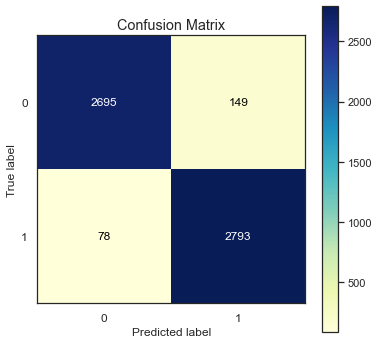

In [106]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_rf, figsize=(6,6), cmap= 'YlGnBu')

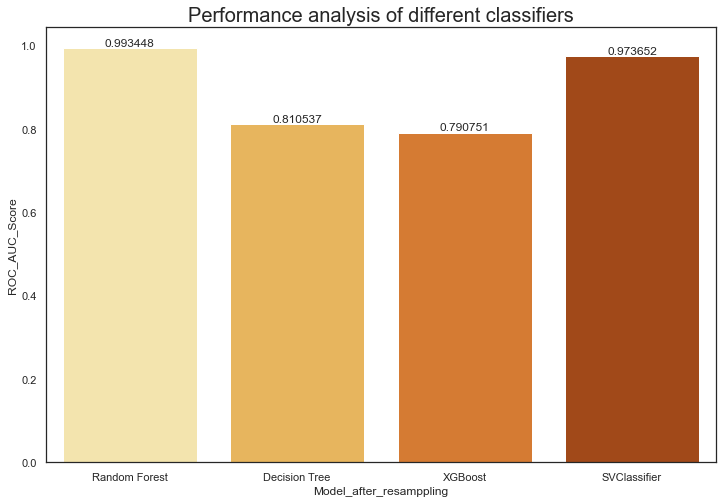

In [107]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['Random Forest','Decision Tree','XGBoost','SVClassifier'],
        'Score': [acc_test_rf, acc_test_dt, acc_test_xgb, acc_test_svc],
        
        'ROC_AUC_Score': [rf_roc_auc_score, dt_roc_auc_score, xgb_roc_auc_score, svc_roc_auc_score]
    }
)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="ROC_AUC_Score", data= Performance, palette="YlOrBr")
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different classifiers',fontsize=20)
plt.show()

In [108]:
Performance.sort_values('ROC_AUC_Score',ascending=False)

,Model_after_resamppling,Score,ROC_AUC_Score
0,Random Forest,0.960280,0.993448
3,SVClassifier,0.959580,0.973652
1,Decision Tree,0.724759,0.810537
2,XGBoost,0.713036,0.790751


In [109]:
X_train

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom
11732,2900,99,50,9,0
18303,3268,99,57,11,0
285,2600,9,27,4,0
20821,2900,99,51,9,0
7442,3200,99,91,9,2
...,...,...,...,...,...
11964,2300,9,35,6,0
21575,2100,6,45,9,1
5390,2100,8,48,5,0
860,3300,8,41,5,0


In [117]:
x_test.head(10)

,bw_grams,psoc_hh,age_hh,hhsize,psccat_mom
5505,3000,1,25,4,0
15602,3300,9,32,4,0
11233,2733,9,27,5,0
13916,3100,8,33,5,0
18536,2400,8,35,7,0
20273,2410,99,49,7,0
22574,2800,6,34,6,0
7969,3300,8,35,4,1
1063,3400,99,34,5,0
7650,3750,8,50,7,0


In [122]:
y_test

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
 rf.predict([[2733,9,27,5,0]])

array([1], dtype=int64)

In [120]:
import pandas as pd
import pickle
with open('underweight_59mos_rf.pkl','wb') as file:
    pickle.dump(rf,file)


In [ ]:
X_balanced

In [ ]:
x_test